In [1]:
import geopandas as gpd
import os
from sqlalchemy import create_engine

In [2]:
engine = create_engine(   
"mssql+pyodbc:///?odbc_connect="
"Driver%3D%7BODBC+Driver+17+for+SQL+Server%7D%3B"
"Server%3Drliddb.int.lcog.org%2C5433%3B"
"Database%3DRLIDGeo%3B"
"Trusted_Connection%3Dyes%3B"
"ApplicationIntent%3DReadWrite%3B"
"WSID%3Dclwrk4087.int.lcog.org%3B")

In [3]:
sql = '''
SELECT 
bike_segid AS id,
name,
ftypedes AS type,
status,
source,
Shape.STAsBinary() AS geom
FROM dbo.BikeFacility;
'''

In [4]:
bikeways = gpd.GeoDataFrame.from_postgis(sql, engine, geom_col='geom')

In [5]:
bikeways.head()

,id,name,type,status,source,geom
0,NaN,Fox Hollow,Paved Shoulder,Built,LCOG,"LINESTRING (4235685.620 849995.967, 4235843.30..."
1,1.0,None,Paved Shoulder,Built,LCOG,"LINESTRING (4216611.495 857908.927, 4216569.84..."
2,2.0,Fox Hollow,Bike Route,Built,LCOG,"LINESTRING (4240496.355 857938.484, 4240518.05..."
3,3.0,Fox Hollow,Bike Route,Built,LCOG,"LINESTRING (4240082.967 859115.739, 4240067.37..."
4,4.0,None,Paved Shoulder,Built,LCOG,"LINESTRING (4237189.007 859678.425, 4237156.94..."


In [6]:
bikeways.columns

Index(['id', 'name', 'type', 'status', 'source', 'geom'], dtype='object')

In [7]:
bikeways['status'].unique()

array(['Built', 'Future', None], dtype=object)

In [8]:
bikeways['type'].unique()

array(['Paved Shoulder', 'Bike Route',
       'Pedestrian and Bicycle Access Way', 'Bike Lane',
       'Shared Use Path', 'Neighborhood Greenway', 'Sidewalk',
       'Connectivity for Routing', None], dtype=object)

In [9]:
bikeways[bikeways['status'] == 'Future']['type'].unique()

array(['Bike Lane', 'Shared Use Path',
       'Pedestrian and Bicycle Access Way', 'Bike Route'], dtype=object)

In [10]:
bikeways = bikeways[bikeways['status'] != 'Future']

In [2]:
outpath = r'T:\MPO\RTP\FY20 2045 Update\Data and Resources\PerformanceAnalysis\sidewalk_bikeway_trails'

In [13]:
bikeways.crs = "EPSG:2914"

In [14]:
bikeways = bikeways.to_crs(epsg=3857)

In [15]:
bikeways.to_file(os.path.join(outpath, "bikeways.shp"))

In [16]:
bikeways.head()

,id,name,type,status,source,geom
0,NaN,Fox Hollow,Paved Shoulder,Built,LCOG,"LINESTRING (-13703922.954 5460743.636, -137038..."
1,1.0,None,Paved Shoulder,Built,LCOG,"LINESTRING (-13712090.803 5463844.762, -137121..."
2,2.0,Fox Hollow,Bike Route,Built,LCOG,"LINESTRING (-13701993.554 5464175.914, -137019..."
3,3.0,Fox Hollow,Bike Route,Built,LCOG,"LINESTRING (-13702183.716 5464669.959, -137021..."
4,4.0,None,Paved Shoulder,Built,LCOG,"LINESTRING (-13703414.665 5464870.646, -137034..."


In [17]:
import matplotlib.pyplot as plt
import contextily as ctx

In [18]:
MPObd = gpd.read_file("V:/Data/Transportation/MPO_Bound.shp")

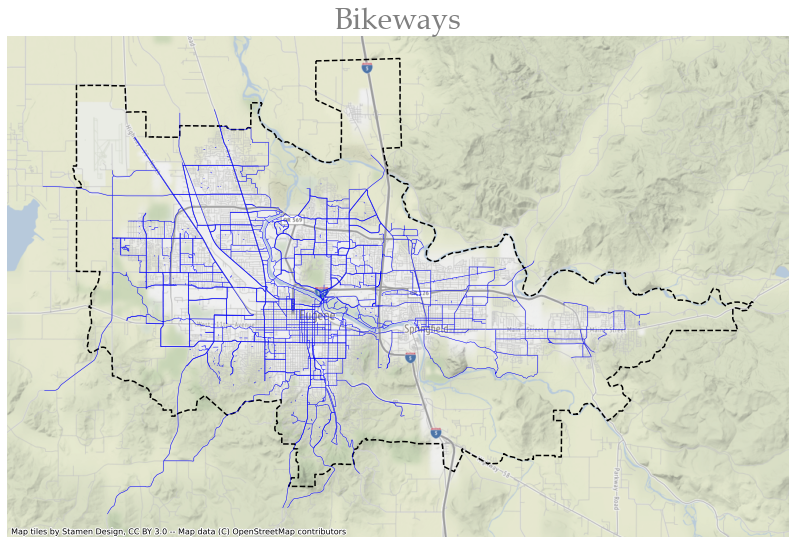

In [19]:
fig, ax = plt.subplots(figsize=(14, 12))
bikeways.plot(ax=ax, color='blue', linewidth = 0.5, aspect=1)
MPObd.plot(ax=ax, facecolor="none", edgecolor="black", linestyle='--', linewidth = 1.5, aspect=1)
ctx.add_basemap(ax, alpha = 0.7)
plt.title("Bikeways", fontsize=30, fontname="Palatino Linotype", 
          color="grey")
ax.axis("off");

In [3]:
import arcpy, os

In [4]:
arcpy.analysis.Clip(os.path.join(outpath, "bikeways.shp"), 
                    "V:/Data/Transportation/MPO_Bound.shp", 
                    os.path.join(outpath, "bikeways_EUG_SPR.shp"))

<Result 'T:\\MPO\\RTP\\FY20 2045 Update\\Data and Resources\\PerformanceAnalysis\\sidewalk_bikeway_trails\\bikeways_EUG_SPR.shp'>

In [70]:
bikeways_EUG_SPR = gpd.read_file(os.path.join(outpath, "bikeways_EUG_SPR.shp"))

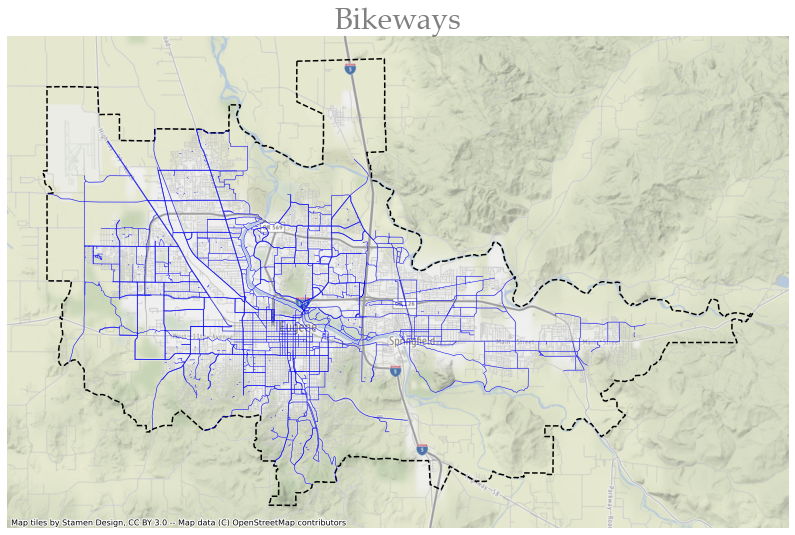

In [71]:
fig, ax = plt.subplots(figsize=(14, 12))
bikeways_EUG_SPR.plot(ax=ax, color='blue', linewidth = 0.5, aspect=1)
MPObd.plot(ax=ax, facecolor="none", edgecolor="black", linestyle='--', linewidth = 1.5, aspect=1)
ctx.add_basemap(ax, alpha = 0.7)
plt.title("Bikeways", fontsize=30, fontname="Palatino Linotype", 
          color="grey")
ax.axis("off");

In [72]:
import numpy as np

In [73]:
bikeways_EUG_SPR['id'] = list(range(1,  bikeways_EUG_SPR.shape[0]+1, 1))
bikeways_EUG_SPR.rename(columns = {'id': 'Id'}, inplace =True)

In [74]:
path = r"T:\MPO\RTP\FY20 2045 Update\Data and Resources\Data\Coburg"

In [75]:
bikewaysCOB = gpd.read_file(os.path.join(path, "Coburg_bikelanes.shp"))

In [76]:
max(bikeways_EUG_SPR['Id'])

3010

In [77]:
bikewaysCOB['Id'] = list(range(max(bikeways_EUG_SPR['Id'])+1,  bikewaysCOB.shape[0] + max(bikeways_EUG_SPR['Id'] + 1), 1))

In [78]:
bikewaysCOB = bikewaysCOB.to_crs(epsg = 3857)

In [79]:
bikeways_EUG_SPR.rename(columns = {'geom': 'geometry'}, inplace =True)

In [80]:
bikeways_MPO = bikeways_EUG_SPR[['Id', 'geometry']].append(bikewaysCOB[['Id', 'geometry']])

In [81]:
type(bikeways_MPO)

geopandas.geodataframe.GeoDataFrame

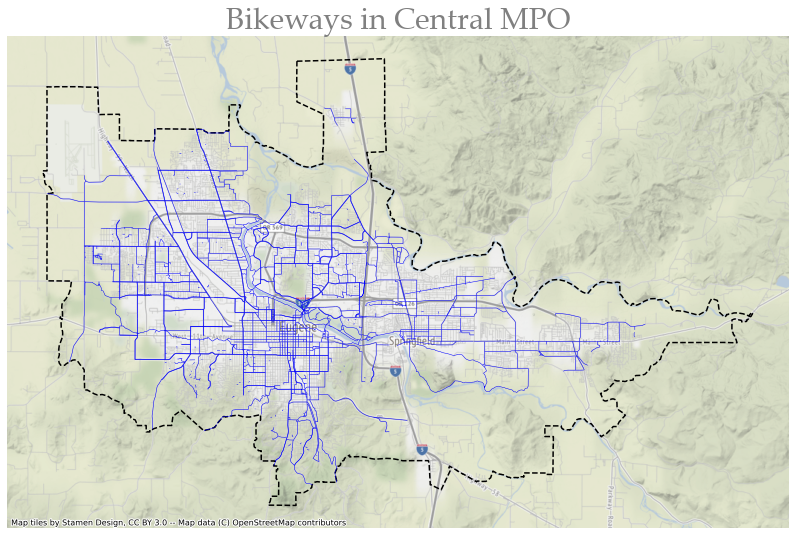

In [82]:
fig, ax = plt.subplots(figsize=(14, 12))
bikeways_MPO.plot(ax=ax, color='blue', linewidth = 0.5, aspect=1)
MPObd.plot(ax=ax, facecolor="none", edgecolor="black", linestyle='--', linewidth = 1.5, aspect=1)
ctx.add_basemap(ax, alpha = 0.7)
plt.title("Bikeways in Central MPO", fontsize=30, fontname="Palatino Linotype", 
          color="grey")
ax.axis("off");

In [83]:
bikeways_MPO.to_file(os.path.join(outpath, 'Bikeways_MPO.shp'))